In [49]:
# Import libaries we need
import numpy as np 
from numpy import genfromtxt
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Section 1) Problem description (0%)

In [ ]:
# In this assignment you will get to practice with a very simple neural network implementation from scratch. 
# This neural network, will have to learn what the important features are in the data to produce the output. 
# In particular, this neural net will be given an input matrix of zeros and ones. The output to each sample will be a single one or zero. 
# The output will be determined by the number in the first feature column of the data samples.

# Section 2) This is your starting code for this assignment (20%)

In [50]:
# Etract and fetch the data from: https://github.com/barnysanchez/clarku assignment4/raw/main/inputANDoutputs.csv
# Utilize genfromtxt() function to load the data from a text file
data = genfromtxt('https://github.com/barnysanchez/clarku-assignment4/raw/main/inputANDoutputs.csv',delimiter=',',skip_header=1)

In [81]:
# Utilize tuple and slicing to capture the value from the data
inputs = data[:, :-1]
outputs = data[:,[-1]]

[[0.99861388]]  Correct:  1
[[0.00390941]]  Correct:  0


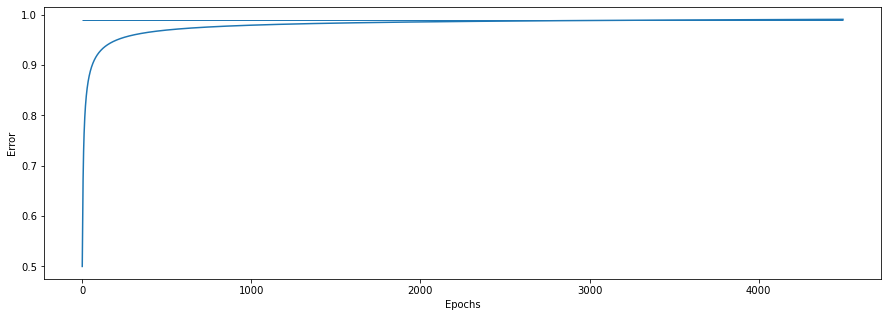

In [84]:
# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for 4500 iterations
    def train(self, epochs = 4500):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)
# function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

# create neural network   
NN = NeuralNetwork(inputs, outputs)
# train neural network
NN.train()

# create examples to predict                                   
ex = np.array([[1, 1, 0]])
ex1 = np.array([[0, 1, 1]])

# Print the predictions                                   
print(NN.predict(ex), ' Correct: ', ex[0][0])
print(NN.predict(ex1), ' Correct: ', ex1[0][0])

# Plot training result
plt.figure(figsize = (15,5))
plt.hlines(y = 0.99, xmin = 0, xmax = len(NN.error_history), linewidth=1) 
plt.plot(NN.epoch_list,[1-error for error in NN.error_history])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [ ]:
# According to the graph we can said that the accuracy is almost achieve 100% if we run more than 4000 epochs

# Section 3) Determine the number of epochs needed to achieve 99% prediction accuracy. Manipulate the plot to clearly show this (35%)

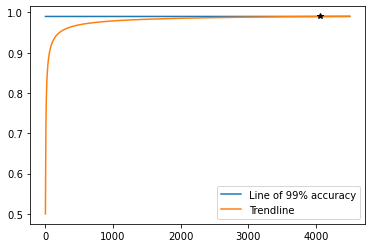

If we run [4057] epochs we can achieve 99% accuracy.


In [85]:
# Using np.diff to calculate the discrete difference along the axis
# Using np.sign to get the sign of the number
# Using np.argwhere to find out where is the non-zero value in our data
x = np.arange(0, len(NN.epoch_list))
y = np.array([0.99,] * len(NN.epoch_list))
y1 = np.array([1-error for error in NN.error_history])
index = np.argwhere(np.diff(np.sign( y - y1 )) != 0).reshape(-1) + 0
plt.plot(x, y)
plt.plot(x, y1)
for i in range(len(index)):
    plt.plot((x[index[i]] + x[index[i]+1]) / 2.,(y[index[i]] + y[index[i] + 1]) / 2., 'k*')
plt.legend(['Line of 99% accuracy', 'Trendline'])
plt.show()
print(f"If we run {x[index]} epochs we can achieve 99% accuracy.")

# Section 4) Change the prediction function to use a softmax activation function instead of sigmoid and determine the number of epochs needed to achieve 99% prediction accuracy with the new prediction function. Manipulate the plot to clearly show this (45%)

[[1.]]  Correct:  1
[[1.]]  Correct:  0


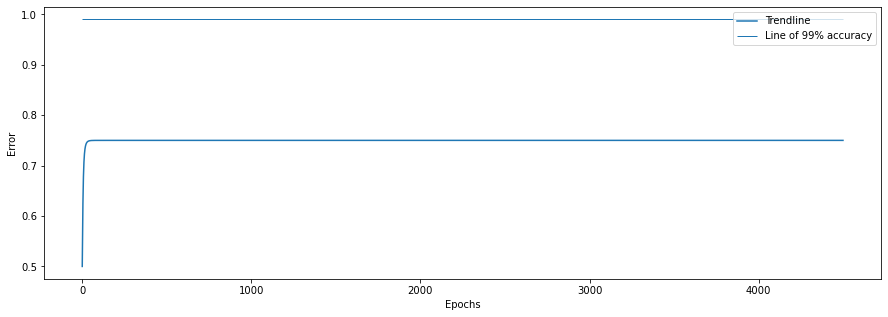

In [91]:
class NeuralNetwork_softmax:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    # activation function ==> exp(logits) / reduce_sum(exp(logits), dim)
    def softmax(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        e = np.exp(x)
        return e / e.sum()

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.softmax(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for 4500 iterations
    def train(self, epochs = 4500):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.softmax(np.dot(new_input, self.weights))
        return prediction
# create neural network   
NN = NeuralNetwork_softmax(inputs, outputs)
# train neural network
NN.train()

# create examples to predict                                   
ex = np.array([[1, 1, 0]])
ex1 = np.array([[0, 1, 1]])

# Print the predictions                                   
print(NN.predict(ex), ' Correct: ', ex[0][0])
print(NN.predict(ex1), ' Correct: ', ex1[0][0])

# Plot training result
plt.figure(figsize=(15,5))
plt.hlines(y = 0.99, xmin = 0, xmax = len(NN.error_history), linewidth = 1) 
plt.plot(NN.epoch_list,[1-error for error in NN.error_history])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend(['Trendline', 'Line of 99% accuracy'])
plt.show()

In [ ]:
# According to the training result we can see the accuracy remain at 75%
# Which means we still have 25% error need to improve (1 - 0.75 = 0.25)
# Therefore, I think softmax is not the suitable method to get the best prediction in this case

In [92]:
# Try to use tensorflow to predict
output = np.array([[1,0], [1,0], [0,1], [0,1]])

In [93]:
xx = tf.placeholder(tf.float32, [None, 3])
yy = tf.placeholder(tf.float32, [None, 2])
number_classes = 2

In [94]:
bias = tf.Variable(tf.random_normal([nb_classes]), name='bias')
weight = tf.Variable(tf.random_normal([3, nb_classes]), name='weight')

In [95]:
# Utilize tf.nn.softmax to sum all the outputs that generated by softmax
hyp = tf.nn.softmax(tf.matmul(xx, weight) + bias)
loss = tf.reduce_mean(-tf.reduce_sum(yy * tf.log(hyp), axis = 1))
opt = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(loss)

In [103]:
# List the epochs and the prediction
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(2500):
        sess.run(opt, feed_dict={xx: inputs, yy: output})
        if epoch % 100 == 0:
            print(epoch, sess.run(loss, feed_dict={xx: inputs, yy: output}))

0 0.7184946
100 0.15296192
200 0.090246856
300 0.06411319
400 0.04975153
500 0.040656436
600 0.034375507
700 0.029776238
800 0.026262384
900 0.023490308
1000 0.021247363
1100 0.019395275
1200 0.017840073
1300 0.016515687
1400 0.015374244
1500 0.01438037
1600 0.013507202
1700 0.012733923
1800 0.01204439
1900 0.011425684
2000 0.010867449
2100 0.010361203
2200 0.009900035
2300 0.009478151
2400 0.009090787


In [ ]:
# According to the result we can said that if we run 2200 epochs we can achieve 99% accuracy of the prediction.